Data Preprocessing

In [8]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define dataset path
data_dir = "./dataset"
categories = ["with_mask", "without_mask"]

data = []
labels = []

for category in categories:
    path = os.path.join(data_dir, category)
    class_label = categories.index(category)

    for img_name in os.listdir(path):
        try:
            img_path = os.path.join(path, img_name)

            # Check if the file is an image
            if not img_path.lower().endswith((".png", ".jpg", ".jpeg")):
                print(f"Skipping non-image file: {img_name}")
                continue

            # print(f"Trying to read: {img_path}")
            img = cv2.imread(img_path)

            # if img is None:
            #     print(f"Failed to load: {img_path}")
            #     continue  # Skip unreadable images


            img = cv2.imread(img_path)

            # Check if the image was loaded successfully
            if img is None:
                print(f"Skipping unreadable image: {img_name}")
                continue

            img = cv2.resize(img, (64, 64))  # Resize to match CNN input
            data.append(img)
            labels.append(class_label)

        except Exception as e:
            print(f"Error loading image {img_name}: {e}")

# Convert to NumPy arrays
data = np.array(data) / 255.0  # Normalize pixel values
labels = np.array(labels)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

print("Dataset successfully loaded!")
print(f"Total images loaded: {len(data)}")


Skipping unreadable image: 0_0_≈˙◊¢ 2020-02-23 132115.png
Skipping unreadable image: 0_0_≈˙◊¢ 2020-02-23 132400.png
Skipping unreadable image: 0_0_≈˙◊¢ 2020-02-24 171804.png
Skipping unreadable image: 0_0_≈˙◊¢ 2020-02-24 172039.png
Skipping unreadable image: 0_0_≈˙◊¢ 2020-02-24 202509.png
Skipping unreadable image: 0_0_≈˙◊¢ 2020-02-24 205216.png
Skipping unreadable image: 0_0_≈˙◊¢ 2020-02-24 215234.png
Skipping unreadable image: 0_0_≈˙◊¢ 2020-02-24 215615.png
Skipping unreadable image: 0_0_≈˙◊¢ 2020-02-24 220536.png
Skipping unreadable image: 0_0_≈˙◊¢ 2020-02-24 222124.png
Skipping unreadable image: 0_0_≈˙◊¢ 2020-02-24 224833.png
Skipping unreadable image: 0_0_≈˙◊¢ 2020-02-24 225329.png
Skipping unreadable image: 0_0_≈˙◊¢ 2020-02-24 225427.png
Skipping unreadable image: 0_0_≈˙◊¢ 2020-02-25 150422.png
Skipping unreadable image: 0_0_≈˙◊¢ 2020-02-25 150847.png
Skipping unreadable image: 0_0_≈˙◊¢ 2020-02-25 150921.png
Skipping unreadable image: 0_0_≈˙◊¢ 2020-02-25 185823.png
Skipping unrea

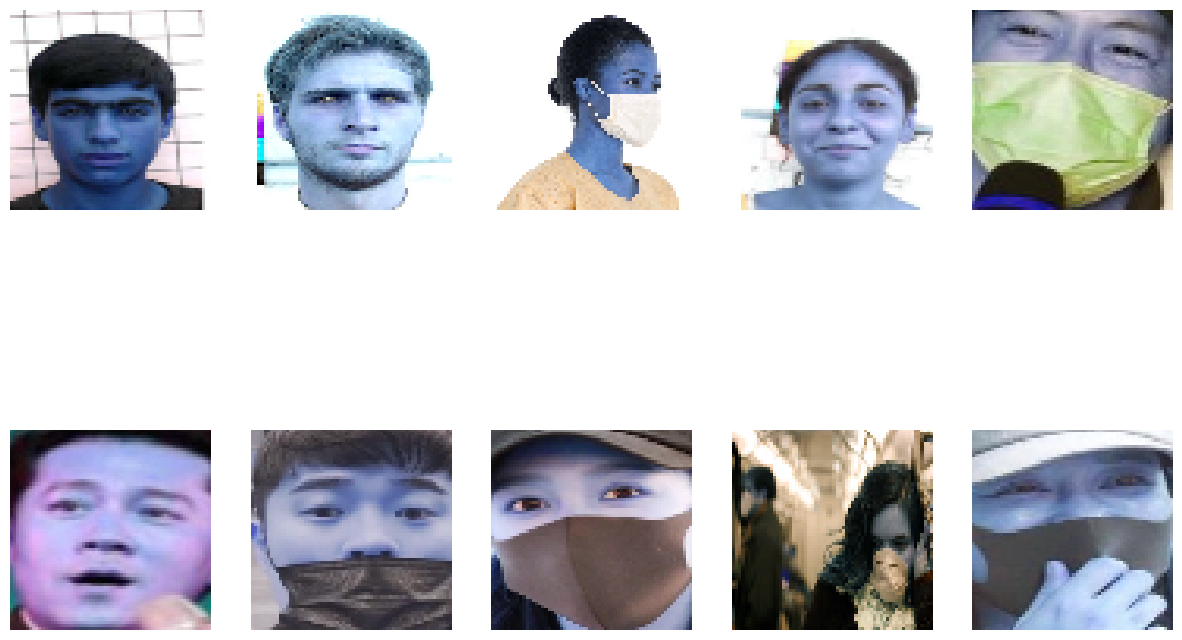

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.axis('off')
plt.show()


Model Training

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Model definition
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(64, 64, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(2, activation="softmax")  # Two classes: With Mask / Without Mask
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)
model.save("mask_detector_model.h5")  # Save model


Epoch 1/10
96/96 [==============================] - 30s 277ms/step - loss: 0.3373 - accuracy: 0.8563 - val_loss: 0.1558 - val_accuracy: 0.9462
Epoch 2/10
96/96 [==============================] - 26s 271ms/step - loss: 0.2128 - accuracy: 0.9242 - val_loss: 0.1619 - val_accuracy: 0.9409
Epoch 3/10
96/96 [==============================] - 26s 271ms/step - loss: 0.1783 - accuracy: 0.9298 - val_loss: 0.1132 - val_accuracy: 0.9593
Epoch 4/10
96/96 [==============================] - 26s 266ms/step - loss: 0.1452 - accuracy: 0.9488 - val_loss: 0.1003 - val_accuracy: 0.9646
Epoch 5/10
96/96 [==============================] - 25s 265ms/step - loss: 0.1160 - accuracy: 0.9557 - val_loss: 0.0783 - val_accuracy: 0.9724
Epoch 6/10
96/96 [==============================] - 25s 265ms/step - loss: 0.1132 - accuracy: 0.9623 - val_loss: 0.1118 - val_accuracy: 0.9646
Epoch 7/10
96/96 [==============================] - 26s 269ms/step - loss: 0.0772 - accuracy: 0.9724 - val_loss: 0.0640 - val_accuracy: 0.9738

TESTING the model

In [18]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("mask_detector_model.h5")

# Load OpenCV's pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Open webcam (0 = default camera)
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]
        face = cv2.resize(face, (64, 64))
        face = np.expand_dims(face, axis=0) / 255.0  # Normalize pixel values

        prediction = model.predict(face)
        label = "Mask" if np.argmax(prediction) == 0 else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

        # Draw bounding box and label on the frame
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

    # Show the video frame
    cv2.imshow("Mask Detection", frame)

    # Press 'q' to quit the webcam
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 150ms/step
